# The following is the Sample Code for the nn-uf User Guide


### First process data from a dataset, or read in X, Y input output values directly

In [1]:
#Import relevant libraries
from Model import *
from dataprep import *

#Assuming you have a dataset located at datefilename,
datafilename = 'dataset/abalone.data'
csvloader = CSVLoader(target=[-1])
datasetX, datasetY = csvloader.load_from_path(datafilename)

# Normalize all numeric columns into [-1, 1] first.
norm = ColumnNormalizer('negpos')

# Add a 'missing indicator' for each column with missing values
ni = NullIndicatorTransformer()

# Impute the NaN's in numeric fields by mean value
mi = NumericImputationTransformer('mean')

# One-hot categorical encoder.  PD.get_dummies() does all the magic
ohe = OneHotEncoderTransformer()

# A pipeline which does transformation one-by-one
pipelineX = PipelineTransformer(norm, ni, mi, ohe)
# For labels we don't need to normalize them
pipelineY = PipelineTransformer(ni, mi, ohe)

# Transform dataset
X = pipelineX.transform(datasetX)
Y = pipelineY.transform(datasetY)


### Now that you have processed the data, you can do one of two things

### Learn to predict Y from X:

In [2]:
#First create a FeedForwardNetwork
NN = FeedForwardNetworkUI([X.shape[1], 10, Y.shape[1]], trans_fcns=["sigmoid", "purelin"], reg_const = 1e-8)

#Train the model on the known dataset
NN.train(X, Y, epochs=10)

#And now this model can be used to predict dependent variables based on independent variables
y_predict = NN.predict(X)

### Or create an autoencoder to compress the dimensionality of the data

In [3]:
#First create an AutoEncoder
encoder = AutoEncoder(X, hidden_dim=3)

#Train the autoencoder for some number of epochs
encoder.train(10)

#Collect reduced dimensionality embedding data:
encoding_vals = encoder.get_encoding_vals()


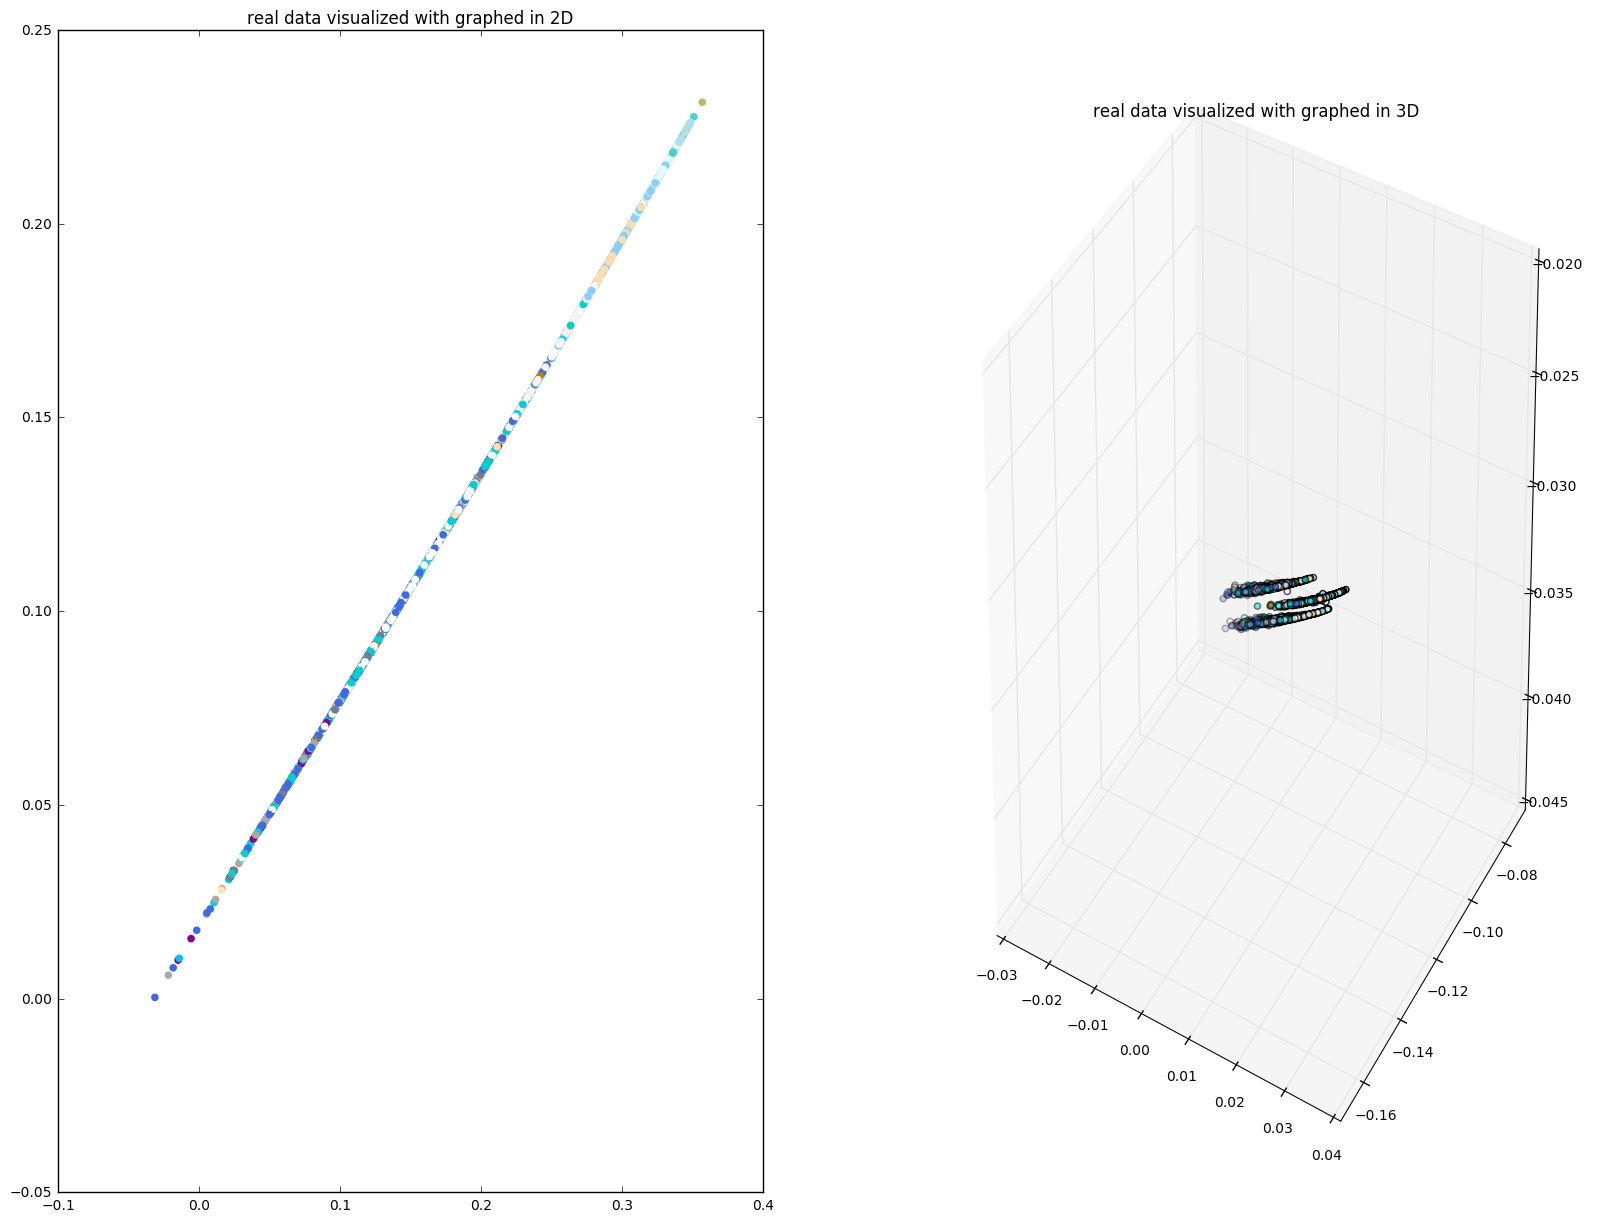

Autoencoding error for this example was 0.030656 and 0.031891 for 2d and 3d visualizations


In [4]:
#This autoencoding can instead be created and visualized for
#by graphing it in low dimensions and coloring the points corresponding to class labels
#by calling the following utility function

from utils import *

autoencoding_err = autoencode_2d_3d_data(X, Y, visualize=1)

print("Autoencoding error for this example was %f and %f for 2d and 3d visualizations" \
      %(autoencoding_err[0], autoencoding_err[1]))